Step 1 - import data set

In [36]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [37]:
path = r'/Users/meghanmcgrath/Documents/Instacart Basket Analysis/02 Data'

In [38]:
df_ex10 = pd.read_pickle(os.path.join(path, 'Prepared Data', 'merged_large_49.pkl'))

In [39]:
df_ex10.head()

user_id first_name last_name  gender     state  age date_joined  \
0    26711    Deborah  Esquivel  Female  Missouri   48  2017-01-01   
1    26711    Deborah  Esquivel  Female  Missouri   48  2017-01-01   
2    26711    Deborah  Esquivel  Female  Missouri   48  2017-01-01   
3    26711    Deborah  Esquivel  Female  Missouri   48  2017-01-01   
4    26711    Deborah  Esquivel  Female  Missouri   48  2017-01-01   

   dependants family_status  income  ...         busiest_days  \
0           3       married  165665  ...         busiest days   
1           3       married  165665  ...  regularly busy days   
2           3       married  165665  ...         busiest days   
3           3       married  165665  ...  regularly busy days   
4           3       married  165665  ...      least busy days   

  busiest_period_of_day  max_order  loyalty_flag  mean_product_price  \
0           Most orders          8  New customer            7.988889   
1           Most orders          8  New customer            7.988889   
2           Most orders          8  New customer            7.988889   
3           Most orders          8  New customer            7.988889   
4           Most orders          8  New customer            7.988889   

   spending_flag  median_order_frequency  median_days_btwn_orders  \
0    Low spender               19.823529                     19.0   
1    Low spender               19.823529                     19.0   
2    Low spender               19.823529                     19.0   
3    Low spender               19.823529                     19.0   
4    Low spender               19.823529                     19.0   

    order_frequency  _merge  
0  Regular customer    both  
1  Regular customer    both  
2  Regular customer    both  
3  Regular customer    both  
4  Regular customer    both  

[5 rows x 35 columns]

In [40]:
df_ex10.shape

(32404859, 35)

In [9]:
df_ex10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   user_id                  int64         
 1   first_name               object        
 2   last_name                object        
 3   gender                   object        
 4   state                    object        
 5   age                      int64         
 6   date_joined              datetime64[ns]
 7   dependants               int64         
 8   family_status            object        
 9   income                   int64         
 10  product_id               int64         
 11  product_name             object        
 12  aisle_id                 int64         
 13  department_id            int64         
 14  prices                   float64       
 15  order_id                 int64         
 16  order_number             int64         
 17  orders_day_of_week       

Step 2 - There are security implications for first name and last name.

Step 3 -  Create a regional segmentation of the data and determine whether there’s a difference in spending habits between the different U.S. regions

In [41]:
# Create new column for 'region' by state
df_ex10.loc[df_ex10['state'].isin(['Maine', 'New Hampshire', 'Vermont' , 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 
                                   'Pennsylvania', 'New Jersey']), 'region'] = 'Northeast'
df_ex10.loc[df_ex10['state'].isin(['Wisconsin', 'Michigan', 'Illinois' , 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 
                                   'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'
df_ex10.loc[df_ex10['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 
                                   'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 
                                   'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'South'
df_ex10.loc[df_ex10['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 
                                   'Washington', 'Oregon', 'California', 'Hawaii',]), 'region'] = 'West'

In [42]:
df_ex10['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [43]:
df_ex10[['state','region']].head(10)

state   region
0  Missouri  Midwest
1  Missouri  Midwest
2  Missouri  Midwest
3  Missouri  Midwest
4  Missouri  Midwest
5  Missouri  Midwest
6  Missouri  Midwest
7  Missouri  Midwest
8  Missouri  Midwest
9  Missouri  Midwest

In [44]:
# Derive average order prices by region
Regional_ord_prices = df_no_outliers.groupby(['region', 'user_id', 'order_id'])['prices'].sum().reset_index()
Regional_cust_prices = Regional_ord_prices.groupby(['region', 'user_id'])['prices'].mean().reset_index()
Regional_avg_prices = Regional_cust_prices.groupby('region')['prices'].mean().reset_index()

NameError: name 'df_no_outliers' is not defined

In [18]:
Regional_avg_prices

NameError: name 'Regional_avg_prices' is not defined

In [19]:
Regional_avg_prices.set_index('region', inplace=True)

NameError: name 'Regional_avg_prices' is not defined

In [20]:
Regional_prices_bar = Regional_avg_prices.sort_index().plot.bar()
plt.subplots_adjust(bottom=0.2)
Regional_prices_bar.set_xlabel('Region')
Regional_prices_bar.set_ylabel('Average Order Price')
Regional_prices_bar.set_title('Average Order Price by Region')
Regional_prices_bar.legend().set_visible(False)
colors = ['mediumseagreen', 'orange', 'lightskyblue', 'pink']
for bar, color in zip(Regional_prices_bar.containers[0], colors):
    bar.set_color(color)

NameError: name 'Regional_avg_prices' is not defined

In [21]:
# Export visualization
path_2 = r'/Users/meghanmcgrath/Documents/Instacart Basket Analysis'

In [22]:
bar.figure.savefig(os.path.join(path_2, '04 Analysis', 'Visualizations', 'bar_avg_order_price_by_region.png'))

NameError: name 'bar' is not defined

In [23]:
# Create a line chart for orders per day by region
Regional_dow_group = df_no_outliers.groupby(['orders_day_of_week', 'region']).size().unstack()

NameError: name 'df_no_outliers' is not defined

In [24]:
# Create line chart for orders by day of week per region
day_names = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: ' Friday', 6: 'Saturday'}
Regional_dow_group = Regional_dow_group.rename(index=day_names)
Regional_dow_group.plot(kind = 'line', stacked = True, color = ['mediumseagreen', 'orange', 'lightskyblue', 'pink'])
plt.title('Regional Number of Orders by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.legend(title='Region')
plt.savefig(os.path.join(path_2, '04 Analysis','Visualizations', 'orders_by_day_of_week_region.png'))

NameError: name 'Regional_dow_group' is not defined

In [25]:
# Create line chart for orders by hour per region
Regional_hour_group = df_no_outliers.groupby(['order_hour_of_day', 'region']).size().unstack()
Regional_hour_group.plot(kind = 'line', stacked = True, color = ['mediumseagreen', 'orange', 'lightskyblue', 'pink'])
plt.title('Hourly Number of Orders by Region ')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.legend(title='Region')
plt.savefig(os.path.join(path_2, '04 Analysis','Visualizations', 'orders_by_hour_of_day_region.png'))

NameError: name 'df_no_outliers' is not defined

Step 4 - Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data

In [45]:
# Create exclusion flag for customers with less than 5 orders
df_ex10['exclusion flag'] = df_ex10['max_order'] < 5

In [46]:
df_ex10['exclusion flag'].value_counts()

exclusion flag
False    30964564
True      1440295
Name: count, dtype: int64

In [47]:
# Creating a new dataset excluding these orders
df_ex10_excl = df_ex10[~df_ex10['exclusion flag']]

In [48]:
df_ex10_excl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404817
Data columns (total 37 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   user_id                  int64         
 1   first_name               object        
 2   last_name                object        
 3   gender                   object        
 4   state                    object        
 5   age                      int64         
 6   date_joined              datetime64[ns]
 7   dependants               int64         
 8   family_status            object        
 9   income                   int64         
 10  product_id               int64         
 11  product_name             object        
 12  aisle_id                 int64         
 13  department_id            int64         
 14  prices                   float64       
 15  order_id                 int64         
 16  order_number             int64         
 17  orders_day_of_week       int64

In [49]:
# Export new data set with excluded orders
df_ex10_excl.to_pickle(os.path.join(path, 'Prepared Data', 'df_ex10_excl.pkl'))

Step 5 -  Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents

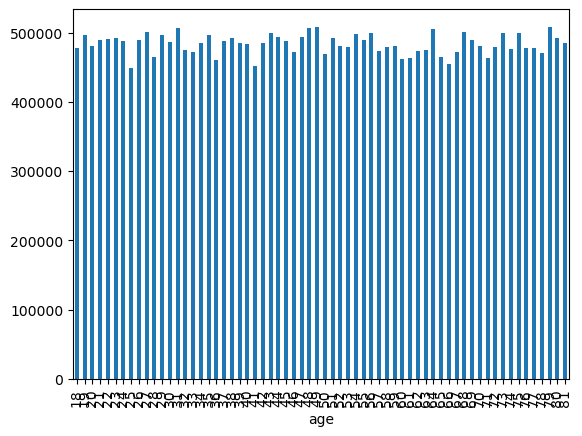

In [50]:
# Create chart for order numbers by age
orders_by_age_bar = df_ex10_excl['age'].value_counts().sort_index().plot.bar()

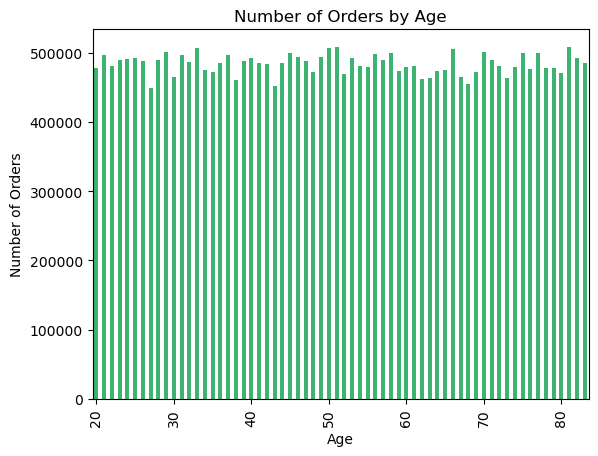

In [31]:
# Change ticks for clarity
orders_by_age_bar = df_ex10_excl['age'].value_counts().sort_index().plot.bar(color = 'mediumseagreen')
axis_ages = [20, 30, 40, 50, 60, 70, 80]
plt.xticks(ticks=[i-20 for i in axis_ages], labels=axis_ages)
plt.xlabel('Age') 
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Age')
plt.savefig(os.path.join(path_2, '04 Analysis','Visualizations', 'orders_by_age_bar.png'))

In [ ]:
# Create a chart for number of orders vs number of dependants
orders_by_dependants_bar = df_ex10_excl['dependants'].value_counts().sort_index().plot.bar(color = 'mediumseagreen')
plt.xlabel('Dependants') 
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Dependants')
plt.savefig(os.path.join(path_2, '04 Analysis','Visualizations', 'orders_by_dependants_bar.png'))

In [ ]:
# Create a scatter plot for average order price by age
age_avg_order_price = df_no_outliers.groupby('age')['prices'].mean().reset_index()
age_avg_order_price_scatter = sns.scatterplot(x = 'age', y = 'prices', data = age_avg_price, color = 'lightskyblue')
age_avg_order_price_scatter.set_xlabel('Age')
age_avg_order_price_scatter.set_ylabel('Average Price')
age_avg_order_price_scatter.set_title('Average Price by Customer Age')
plt.savefig(os.path.join(path_2, '04 Analysis','Visualizations', 'age_avg_price_scatter.png'))

In [ ]:
# Create a scatter plot for average order price by income
income_avg_order_price = df_ex10_excl.groupby('income')['prices'].mean().reset_index()

In [ ]:
income_avg_order_price.head()

In [ ]:
income_avg_price_scatter = sns.scatterplot(x = 'income', y = 'prices', data = income_avg_order_price, color = 'lightskyblue')
income_avg_price_scatter.set_xlabel('Income')
income_avg_price_scatter.set_ylabel('Average Price')
income_avg_price_scatter.set_title('Average Price by Income')
plt.savefig(os.path.join(path_2, '04 Analysis','Visualizations', 'income_avg_price_scatter_BAD.png'))

In [ ]:
income_avg_order_price.describe()

In [54]:
# Detect outliers - calculate x z score
z = np.abs(scipy.stats.zscore(df_ex10_excl['prices']))
print(z)

0           0.005970
1           0.005970
2           0.005970
3           0.015536
4           0.015536
              ...   
32404813    0.021235
32404814    0.021235
32404815    0.021235
32404816    0.006784
32404817    0.012076
Name: prices, Length: 30964564, dtype: float64


In [55]:
threshold = 3
outliers = df_ex10_excl[z > threshold]
print(outliers)

          user_id first_name last_name  gender         state  age date_joined  \
5594       117740       Lisa    Sparks  Female        Oregon   55  2017-01-01   
10355       31590    Beverly   Sanford  Female       Montana   46  2017-01-01   
27973      100958   Benjamin   Parsons    Male  North Dakota   18  2017-01-02   
27974      100958   Benjamin   Parsons    Male  North Dakota   18  2017-01-02   
27975      100958   Benjamin   Parsons    Male  North Dakota   18  2017-01-02   
...           ...        ...       ...     ...           ...  ...         ...   
32391295     5519      Kathy    Daniel  Female       Georgia   78  2020-04-01   
32391296     5519      Kathy    Daniel  Female       Georgia   78  2020-04-01   
32391297     5519      Kathy    Daniel  Female       Georgia   78  2020-04-01   
32396982   140589   Clarence    Harper    Male      Maryland   26  2020-04-01   
32400031   200065       Gary    Wilson    Male     Tennessee   59  2020-04-01   

          dependants       

In [56]:
df_no_outliers = df_ex10_excl.drop(outliers.index)

In [ ]:
income_avg_price = df_no_outliers.groupby('income')['prices'].mean().reset_index()

In [ ]:
income_avg_price_scatter = sns.scatterplot(x = 'income', y = 'prices', data = income_avg_price, color = 'lightskyblue')
income_avg_price_scatter.set_xlabel('Income')
income_avg_price_scatter.set_ylabel('Average Price')
income_avg_price_scatter.set_title('Average Price by Income')
plt.savefig(os.path.join(path_2, '04 Analysis','Visualizations', 'income_avg_price_scatter.png'))

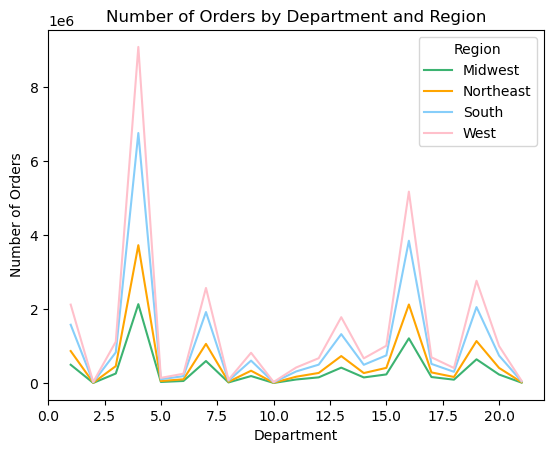

In [219]:
# Create a stacked line chart for order number by department and region
region_department_orders = df_no_outliers.groupby(['department_id', 'region']).size().unstack()
region_department_line = region_department_orders.plot(kind = 'line', stacked = True,  color = ['mediumseagreen', 
                                                       'orange', 'lightskyblue', 'pink'])
plt.title('Number of Orders by Department and Region')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.legend(title='Region')
plt.savefig(os.path.join(path_2, '04 Analysis','Visualizations', 'region_department_line.png'))

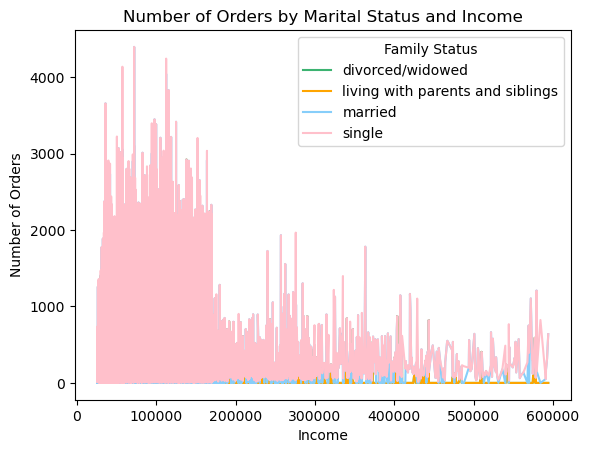

In [220]:
# Create a stacked line chart for order number by family status and income
marital_status_income_orders = df_no_outliers.groupby(['income', 'family_status']).size().unstack()
marital_status_income_orders_line = marital_status_income_orders.plot(kind = 'line', stacked = True,  color = ['mediumseagreen', 
                                                       'orange', 'lightskyblue', 'pink'])
plt.title('Number of Orders by Marital Status and Income')
plt.xlabel('Income')
plt.ylabel('Number of Orders')
plt.legend(title='Family Status')
plt.savefig(os.path.join(path_2, '04 Analysis','Visualizations', 'marital_status_income_orders_line.png'))

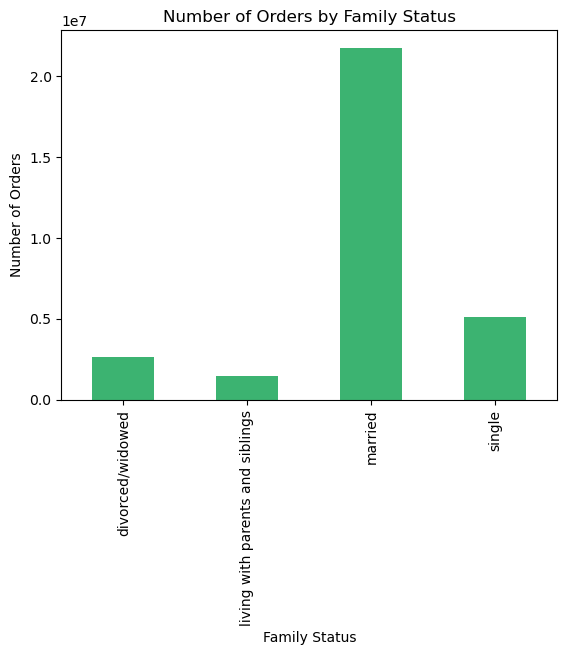

In [221]:
# Create a chart for number of orders by family status
orders_by_family_status = df_no_outliers['family_status'].value_counts().sort_index().plot.bar(color = 'mediumseagreen')
plt.xlabel('Family Status')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Family Status')
plt.savefig(os.path.join(path_2, '04 Analysis','Visualizations', 'orders_by_family_status_bar.png'))

In [227]:
df_no_outliers.shape

(30959687, 37)

In [235]:
df_no_outliers.reset_index()

index  user_id first_name last_name  gender     state  age  \
0                0    26711    Deborah  Esquivel  Female  Missouri   48   
1                1    26711    Deborah  Esquivel  Female  Missouri   48   
2                2    26711    Deborah  Esquivel  Female  Missouri   48   
3                3    26711    Deborah  Esquivel  Female  Missouri   48   
4                4    26711    Deborah  Esquivel  Female  Missouri   48   
...            ...      ...        ...       ...     ...       ...  ...   
30959682  32404813   135902      Doris  Richmond  Female  Missouri   66   
30959683  32404814   135902      Doris  Richmond  Female  Missouri   66   
30959684  32404815   135902      Doris  Richmond  Female  Missouri   66   
30959685  32404816   135902      Doris  Richmond  Female  Missouri   66   
30959686  32404817   135902      Doris  Richmond  Female  Missouri   66   

         date_joined  dependants family_status  ...  max_order  loyalty_flag  \
0         2017-01-01           3       married  ...          8  New customer   
1         2017-01-01           3       married  ...          8  New customer   
2         2017-01-01           3       married  ...          8  New customer   
3         2017-01-01           3       married  ...          8  New customer   
4         2017-01-01           3       married  ...          8  New customer   
...              ...         ...           ...  ...        ...           ...   
30959682  2020-04-01           2       married  ...          8  New customer   
30959683  2020-04-01           2       married  ...          8  New customer   
30959684  2020-04-01           2       married  ...          8  New customer   
30959685  2020-04-01           2       married  ...          8  New customer   
30959686  2020-04-01           2       married  ...          8  New customer   

         mean_product_price  spending_flag  median_order_frequency  \
0                  7.988889    Low spender               19.823529   
1                  7.988889    Low spender               19.823529   
2                  7.988889    Low spender               19.823529   
3                  7.988889    Low spender               19.823529   
4                  7.988889    Low spender               19.823529   
...                     ...            ...                     ...   
30959682           6.960345    Low spender               10.592593   
30959683           6.960345    Low spender               10.592593   
30959684           6.960345    Low spender               10.592593   
30959685           6.960345    Low spender               10.592593   
30959686           6.960345    Low spender               10.592593   

          median_days_btwn_orders    order_frequency  _merge   region  \
0                            19.0   Regular customer    both  Midwest   
1                            19.0   Regular customer    both  Midwest   
2                            19.0   Regular customer    both  Midwest   
3                            19.0   Regular customer    both  Midwest   
4                            19.0   Regular customer    both  Midwest   
...                           ...                ...     ...      ...   
30959682                      8.0  Frequent customer    both  Midwest   
30959683                      8.0  Frequent customer    both  Midwest   
30959684                      8.0  Frequent customer    both  Midwest   
30959685                      8.0  Frequent customer    both  Midwest   
30959686                      8.0  Frequent customer    both  Midwest   

          exclusion flag  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  
...                  ...  
30959682           False  
30959683           False  
30959684           False  
30959685           False  
30959686           False  

[30959687 rows x 38 columns]

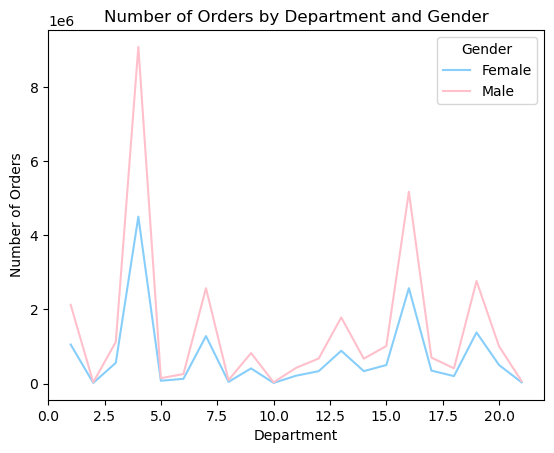

In [249]:
# Create a stacked line chart for order number by department and gender
region_department_orders = df_no_outliers.groupby(['department_id', 'gender']).size().unstack()
region_department_line = region_department_orders.plot(kind = 'line', stacked = True,  color = ['lightskyblue', 'pink'])
plt.title('Number of Orders by Department and Gender')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.legend(title='Gender')
plt.savefig(os.path.join(path_2, '04 Analysis','Visualizations', 'gender_department_line.png'))

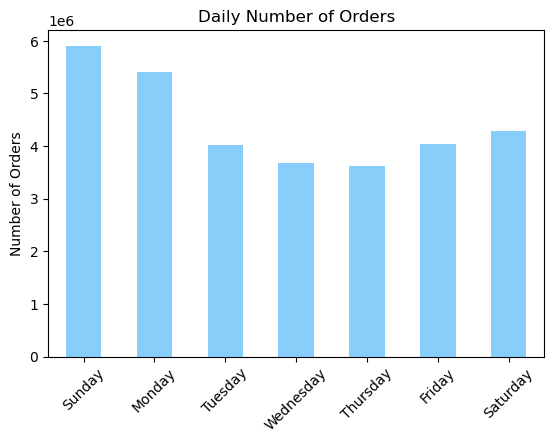

In [253]:
order_day_bar = df_no_outliers['orders_day_of_week'].value_counts().sort_index().plot.bar(color = 'lightskyblue')
plt.subplots_adjust(bottom=0.2)
order_day_bar.set_xlabel('')
order_day_bar.set_ylabel('Number of Orders')
order_day_bar.set_title('Daily Number of Orders')
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
order_day_bar.set_xticklabels(days, rotation=45)
plt.savefig(os.path.join(path_2, '04 Analysis','Visualizations', 'orders_by_day_bar.png'))

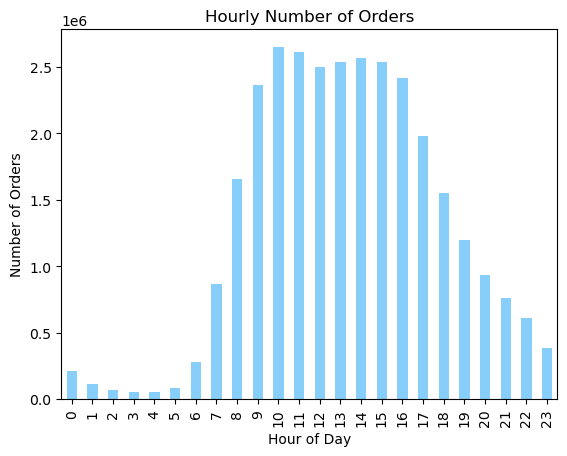

In [254]:
order_hour_bar = df_no_outliers['order_hour_of_day'].value_counts().sort_index().plot.bar(color = 'lightskyblue')
order_hour_bar.set_xlabel('Hour of Day')
order_hour_bar.set_ylabel('Number of Orders')
order_hour_bar.set_title('Hourly Number of Orders')
plt.savefig(os.path.join(path_2, '04 Analysis','Visualizations', 'orders_by_hour_bar.png'))

In [266]:
loyal_counts = df_no_outliers['loyalty_flag'].value_counts()
loyal_counts

loyalty_flag
Regular customer    15874128
Loyal customer      10282763
New customer         4802796
Name: count, dtype: int64

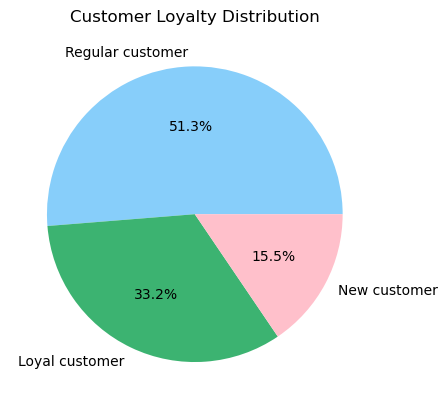

In [267]:
loyal_counts = df_no_outliers['loyalty_flag'].value_counts()
plt.pie(loyal_counts,labels = loyal_counts.index, autopct='%1.1f%%', colors=['lightskyblue', 'mediumseagreen', 'pink'])
plt.title('Customer Loyalty Distribution')
plt.savefig(os.path.join(path_2, '04 Analysis','Visualizations', 'loyalty_pie.png'))

In [268]:
#price per order
loyalty_price_per_order = df_no_outliers.groupby(['loyalty_flag', 'user_id', 'order_id'])['prices'].sum().reset_index()

In [3]:
loyalty_price_per_order

NameError: name 'loyalty_price_per_order' is not defined

In [274]:
#price per user
loyalty_avg_price_per_user = loyalty_price_per_order.groupby(['loyalty_flag', 'user_id'])['prices'].mean().reset_index()

In [275]:
loyalty_avg_price_per_user

loyalty_flag  user_id      prices
0         Loyal customer       27   72.432099
1         Loyal customer       50   53.407463
2         Loyal customer       54   69.085714
3         Loyal customer       90   49.409859
4         Loyal customer      140  108.610526
...                  ...      ...         ...
162626  Regular customer   206200  101.465217
162627  Regular customer   206201  100.987500
162628  Regular customer   206202   73.404545
162629  Regular customer   206207  101.931250
162630  Regular customer   206209   70.046154

[162631 rows x 3 columns]

In [276]:
# price per loyalty tier
loyalty_avg_price = loyalty_avg_price_per_user.groupby('loyalty_flag')['prices'].mean().reset_index()

In [277]:
loyalty_avg_price

loyalty_flag     prices
0    Loyal customer  79.432911
1      New customer  76.882202
2  Regular customer  79.287492

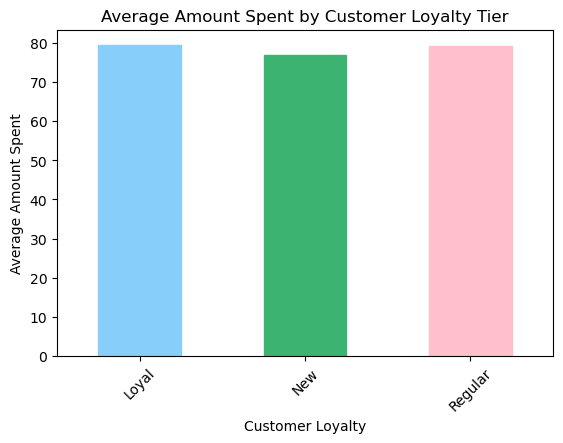

In [281]:
# create bar chart for average order price by loyalty tier
loyalty_price_bar = loyalty_avg_price.sort_index().plot.bar()
loyalty_price_bar.set_xlabel('Customer Loyalty')
loyalty_price_bar.set_ylabel('Average Amount Spent')
loyalty_price_bar.set_title('Average Amount Spent by Customer Loyalty Tier')
loyalty = ['Loyal', 'New', 'Regular']
loyalty_price_bar.set_xticklabels(loyalty, rotation=45)
plt.subplots_adjust(bottom=0.2)
colors = ['lightskyblue', 'mediumseagreen', 'pink']
loyalty_price_bar.legend().set_visible(False)
for bar, color in zip(loyalty_price_bar.containers[0], colors):
    bar.set_color(color)
plt.savefig(os.path.join(path_2, '04 Analysis','Visualizations', 'loyalty_bar.png'))

AttributeError: 'DataFrame' object has no attribute 'xticklabels'

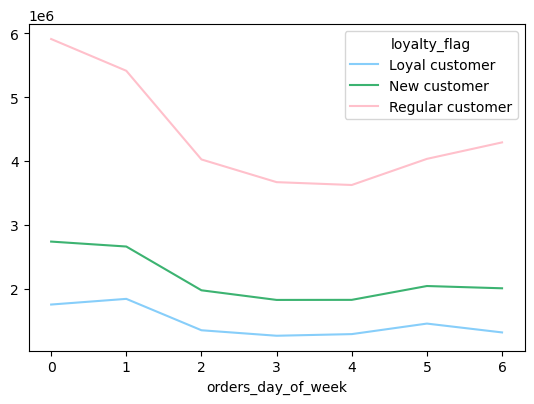

In [298]:
# Create a stacked line chart for order number by weekday and loyalty tier
loyalty_dow_orders = df_no_outliers.groupby(['orders_day_of_week', 'loyalty_flag']).size().unstack()
loyalty_dow_orders.plot(kind = 'line', stacked = True, color = ['lightskyblue', 'mediumseagreen', 'pink'])
plt.subplots_adjust(bottom=0.2)
plt.title('Number of Orders vs Day of the Week for Each Loyalty Flag')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.legend(title='Loyalty Tier')

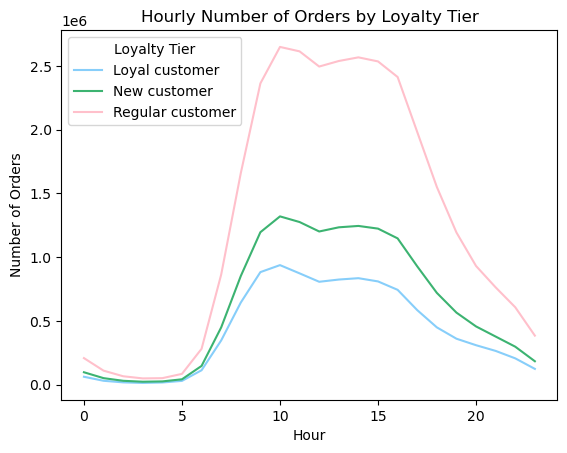

In [297]:
Loyalty_hour_group = df_no_outliers.groupby(['order_hour_of_day', 'loyalty_flag']).size().unstack()
Loyalty_hour_group.plot(kind = 'line', stacked = True, color = ['lightskyblue', 'mediumseagreen', 'pink'])
plt.title('Hourly Number of Orders by Loyalty Tier')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.legend(title='Loyalty Tier')
plt.savefig(os.path.join(path_2, '04 Analysis','Visualizations', 'loyalty_by_hour.png'))

Creating user profiles based on age, income and dependants

In [300]:
df_no_outliers[['income','age','dependants']].describe()

income           age    dependants
count  3.095969e+07  3.095969e+07  3.095969e+07
mean   9.965502e+04  4.946803e+01  1.501815e+00
std    4.309143e+04  1.848527e+01  1.118898e+00
min    2.590300e+04  1.800000e+01  0.000000e+00
25%    6.728600e+04  3.300000e+01  1.000000e+00
50%    9.676100e+04  4.900000e+01  2.000000e+00
75%    1.280810e+05  6.500000e+01  3.000000e+00
max    5.939010e+05  8.100000e+01  3.000000e+00

In [302]:
df_no_outliers['income'].describe().apply(lambda x: format(x, 'f'))

count    30959687.000000
mean        99655.022098
std         43091.430751
min         25903.000000
25%         67286.000000
50%         96761.000000
75%        128081.000000
max        593901.000000
Name: income, dtype: object

In [57]:
# Setting thresholds
def income_level(row):
    if row['income'] <= 50000:
        return 'Low income'
    elif (row['income'] > 50000) and (row['income'] <= 100000):
        return 'Medium income'
    elif row['income'] > 100000:
        return 'High income'

In [58]:
# Apply thresholds
df_no_outliers = df_no_outliers.apply(income_level, axis=1)

In [62]:
df_no_outliers.head()

0    High income
1    High income
2    High income
3    High income
4    High income
dtype: object

In [61]:
# Export dataframe to pickle
df_no_outliers.to_pickle(os.path.join(path, 'Prepared Data', 'df_no_outliers_ex10.pkl'))